# Import necessary libraries

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

import nltk

from nltk.corpus import stopwords
import wordcloud
from wordcloud import WordCloud, STOPWORDS
from matplotlib import pyplot as plt 

# loading the dataset

In [37]:
data = pd.read_csv('IMDB_Dataset.csv')
data_frame = pd.DataFrame(data)
data_frame=data_frame[:10000]
data_frame.head()

review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive

# counting positive and negetive reviews

In [38]:
# data['sentiment'] = data['sentiment'].map({'positive': 1, 'negative': 0})
data_frame['sentiment'].value_counts()

sentiment
positive    5028
negative    4972
Name: count, dtype: int64

<Axes: xlabel='sentiment', ylabel='count'>

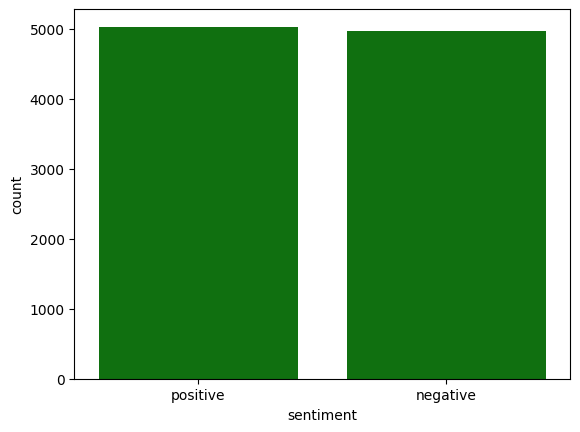

In [39]:
sns.countplot(x='sentiment', data=data_frame, color = 'g')

# confused

In [40]:
positive_review=list(data_frame[data_frame['sentiment']=='positive']['review'])
negative_review=list(data_frame[data_frame['sentiment']=='negative']['review'])

In [41]:
def create_cloud(string, title=None):
    cloud = WordCloud(height=1080, 
                      width=1920, 
                      background_color='white', 
                      min_font_size=10, 
                      stopwords=STOPWORDS).generate(string)
    plt.figure(figsize=(100,200))
    plt.imshow(cloud, interpolation="bilinear")
    plt.axis("off")
    if title:
        plt.title(title, fontdict={'fontsize':24})
    plt.show()

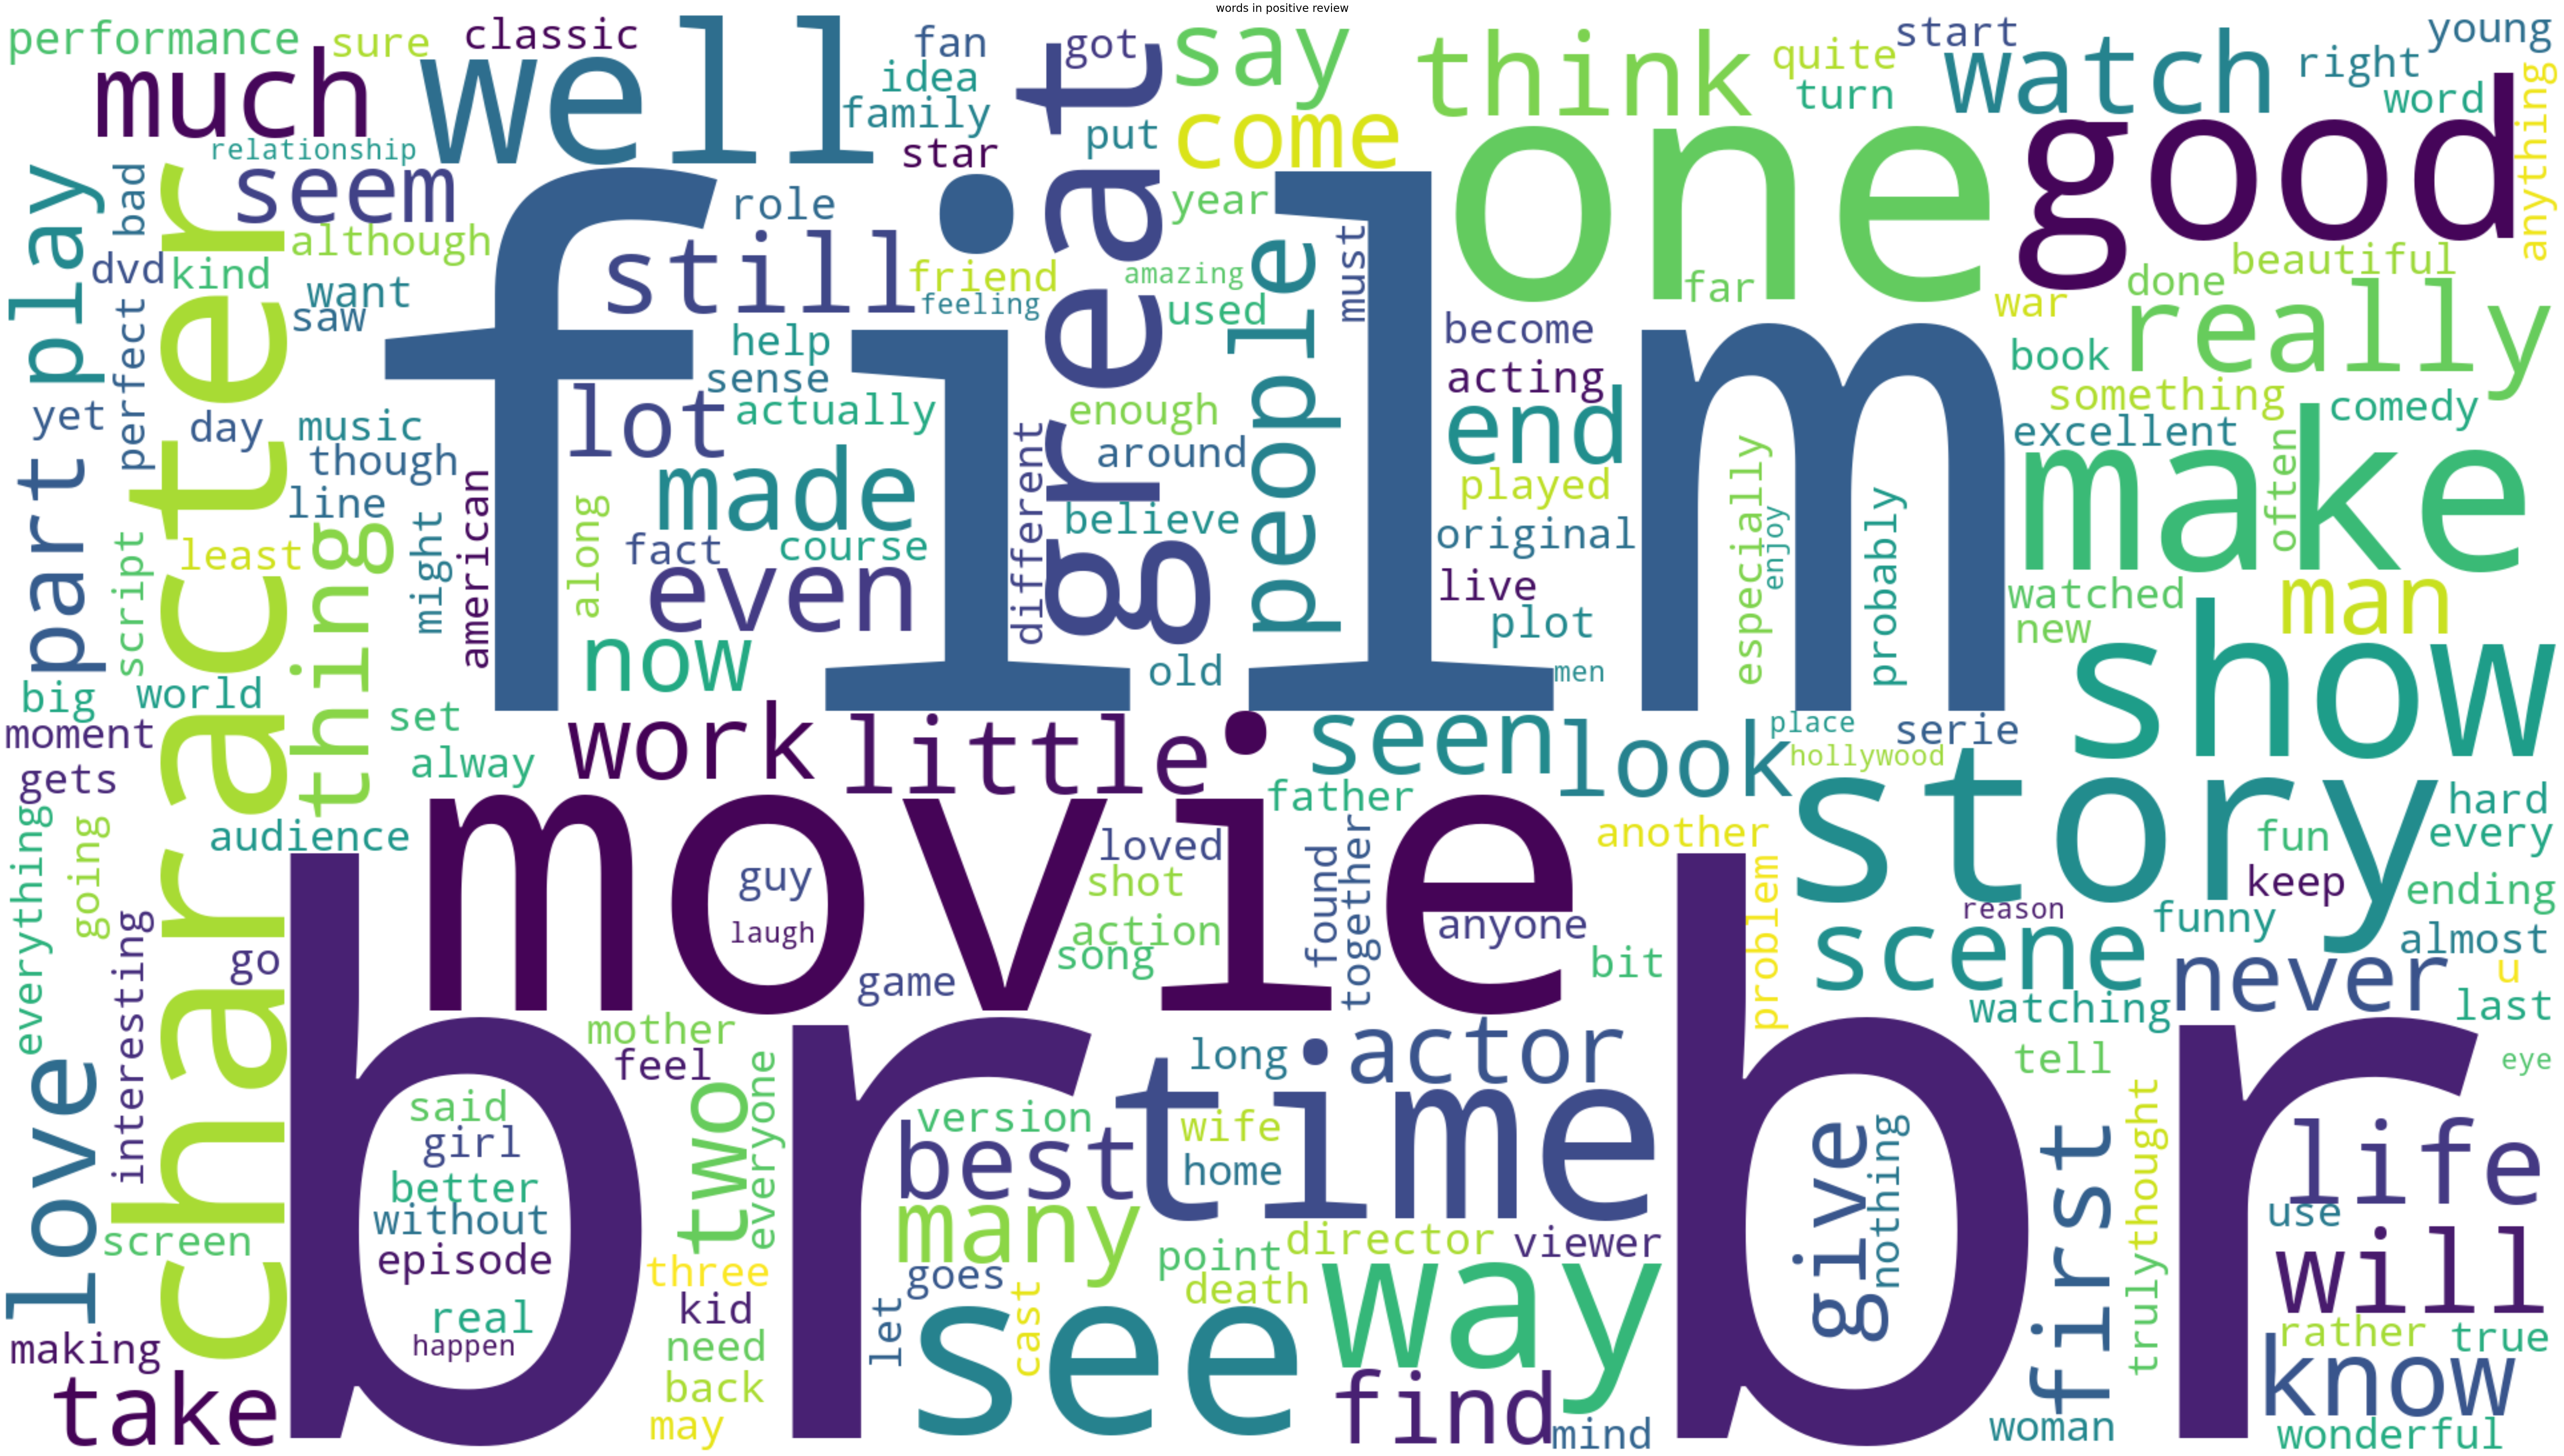

In [42]:
create_cloud(' '.join(positive_review).lower(),'words in positive review')

In [43]:
def text_processing(data):
    from bs4 import BeautifulSoup
    import re
    def decontracted(phrase):
        # specific
        phrase= re.sub(r'<br /><br />',' ',phrase)
        phrase = re.sub(r"won't", "will not", phrase)
        phrase = re.sub(r"can\'t", "can not", phrase)

        # general
        phrase = re.sub(r"n\'t", " not", phrase)
        phrase = re.sub(r"\'re", " are", phrase)
        phrase = re.sub(r"\'s", " is", phrase)
        phrase = re.sub(r"\'d", " would", phrase)
        phrase = re.sub(r"\'ll", " will", phrase)
        phrase = re.sub(r"\'t", " not", phrase)
        phrase = re.sub(r"\'ve", " have", phrase)
        phrase = re.sub(r"\'m", " am", phrase)
        phrase = re.sub(r'"', " ", phrase)
        return phrase
    stopwords=set(STOPWORDS)

    # Combining all the above stundents 
    from tqdm import tqdm
    preprocessed_reviews = []
    # tqdm is for printing the status bar
    for sentance in tqdm(data['review'].values):
        sentance = re.sub(r"http\S+", "", sentance) # removing https tags
        sentance = BeautifulSoup(sentance, 'lxml').get_text()  # removing lxmls tags
        sentance = decontracted(sentance)
        sentance = re.sub("\S*\d\S*", "", sentance).strip()  # removing extra (more then 1 space) spaces
        # https://gist.github.com/sebleier/554280



        # This line of code is converting the `sentance` string into a list of words by splitting it based on spaces (`sentance.split()`), 
        # then it is converting each word to lowercase (`e.lower()`) and checking if the word is not in the `stopwords` 
        # Finally, it joins these filtered words back into a string with spaces in between (`' '.join(...)`).
        sentance = ' '.join(e.lower() for e in sentance.split() if e not in stopwords)
        preprocessed_reviews.append(sentance.strip()) # removing spaces in last of sentence
    

    from nltk.stem import PorterStemmer

    porter = PorterStemmer()
    list2=[]
    for  sentence in preprocessed_reviews:
      list1=[]
      for words in sentence.split():
        list1.append(porter.stem(words))

      list2.append(' '.join(list1))
    return(list2)

# Making All words into it's root word

In [44]:
from nltk.stem import PorterStemmer
porter = PorterStemmer()
porter.stem('Going')

'go'

# Dowload Necessaries for nltk

In [45]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\abeer\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\abeer\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [46]:
# import these modules
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

print("rocks :", lemmatizer.lemmatize("rocks"))
print("corpora :", lemmatizer.lemmatize("corpora"))

# a denotes adjective in "pos"
print("better :", lemmatizer.lemmatize("better", pos="a"))


rocks : rock
corpora : corpus
better : good


In [47]:
x=text_processing(data_frame)

  7%|▋         | 731/10000 [00:00<00:07, 1171.58it/s]C:\Users\abeer\AppData\Roaming\Python\Python310\site-packages\bs4\__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(
100%|██████████| 10000/10000 [00:06<00:00, 1475.86it/s]


# creating new column

In [48]:
data_frame['cleaned_review']=x

In [49]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data_frame.sentiment = le.fit_transform(data_frame.sentiment)

In [50]:
data_frame.head()

review  sentiment  \
0  One of the other reviewers has mentioned that ...          1   
1  A wonderful little production. <br /><br />The...          1   
2  I thought this was a wonderful way to spend ti...          1   
3  Basically there's a family where a little boy ...          0   
4  Petter Mattei's "Love in the Time of Money" is...          1   

                                      cleaned_review  
0  one review mention watch oz episod will hooked...  
1  a wonder littl production. the film techniqu u...  
2  i thought wonder way spend time hot summer wee...  
3  basic famili littl boy (jake) think zombi clos...  
4  petter mattei love time money visual stun film...

# End of Pre-Processiong

# Strated Model Training

In [51]:
data_frame_x=data_frame['cleaned_review']
data_frame_y=data_frame['sentiment'] 

In [52]:
data_frame_x.shape

(10000,)

In [53]:
data_frame_y.shape

(10000,)

# Destribution of data into test and train

In [54]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_frame_x[:10000], data_frame_y[:10000], test_size=0.2, random_state=0)

# train_test_split()

# Getting the ratio

In [55]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8000,), (2000,), (8000,), (2000,))

# Counting the overall number of positive and negetive reviews

In [56]:
y_train.value_counts()

sentiment
1    4007
0    3993
Name: count, dtype: int64

In [57]:
X_train

7389    i must say, i saw film site, i figur well wort...
9275    kalifornia stori writer girlfriend photograph ...
2995    to experi head realli need understand monke fi...
5316    greet deris critic first appeared, 'frenzy' re...
356     watch last night bowl heartfelt stori line, ex...
                              ...                        
9225    crimin perri smith richard dick hickock believ...
4859    i love movie. great storylin actor good movi s...
3264    i want one - situat rich, set unusu interestin...
9845    i tri watch everyday time, even though i watch...
2732    ag excel present drama, suspens thriller rare ...
Name: cleaned_review, Length: 8000, dtype: object

# Data Processing with BOW

In [58]:
from sklearn.feature_extraction.text import CountVectorizer

# vectorizer = CountVectorizer(max_features=200) # outpu6: ((80, 200), (20, 200))
#vectorizer = CountVectorizer(ngram_range=(1, 2)) # taking multiple words iin combination {bi-gram, tri-gram}
vectorizer = CountVectorizer(max_features=10, ngram_range=(1, 2)) 
X_train_bow = vectorizer.fit_transform(X_train)
X_test_bow = vectorizer.transform(X_test)

# getting shape of train and test data
X_train_bow.shape,X_test_bow.shape

((8000, 10), (2000, 10))

In [59]:
list(X_test_bow.toarray()[0])

[4, 4, 4, 3, 1, 3, 0, 1, 1, 4]

# Giving priority to very less minority words

In [60]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features = 10,ngram_range=(1,2))
X_train_bow = vectorizer.fit_transform(X_train)
X_test_bow = vectorizer.fit_transform(X_test)

X_train_bow.shape,X_test_bow.shape

((8000, 10), (2000, 10))

# PCA (Optional)

In [61]:
# import numpy as np
# from sklearn.decomposition import PCA
# pca = PCA(n_components=2)
# dimention_reduced_data = pca.fit_transform(X.toarray())

# print(pca.explained_variance_ratio_)

# import pandas as pd
# principal_breast_Df = pd.DataFrame(data = dimention_reduced_data, columns = ['principal component 1', 'principal component 2'])

# principal_breast_Df

In [62]:
print(y_train)

7389    0
9275    1
2995    1
5316    0
356     1
       ..
9225    1
4859    1
3264    0
9845    1
2732    1
Name: sentiment, Length: 8000, dtype: int32


# Machine Learning with KNN

In [63]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data_frame.sentiment = le.fit_transform(data_frame.sentiment)
data_frame.sentiment

0       1
1       1
2       1
3       0
4       1
       ..
9995    1
9996    0
9997    0
9998    0
9999    1
Name: sentiment, Length: 10000, dtype: int64

In [64]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score
accuracy_train_list = []
accuracy_test_list = []
f1_train_list = []
f1_test_list = []
for i in range(10,60,5):
    print('K', i)

    # initialization
    neigh = KNeighborsClassifier(n_neighbors=i) #number of neighbour
    
    # Training
    neigh.fit(X_train_bow, y_train) #.fit means model train 

    # Test the training data
    y_pred_train = neigh.predict(X_train_bow)
    accuracy_train = accuracy_score(y_pred_train,y_train)
    accuracy_train_list.append(accuracy_train)
    f1_train = f1_score(y_pred_train,y_train)
    f1_train_list.append(f1_train)

    # Test the test data
    y_pred_test = neigh.predict(X_test_bow)
    accuracy_test = accuracy_score(y_pred_test,y_test)
    accuracy_test_list.append(accuracy_test)
    f1_test = f1_score(y_pred_test,y_test)
    f1_test_list.append(f1_test)

    print(accuracy_train,accuracy_test)
    print(f1_train,f1_test)
    print()

K 10
0.631375 0.5005
0.5865694658628908 0.4755905511811024

K 15
0.60975 0.5
0.6122702434177844 0.5395948434622467

K 20
0.59475 0.503
0.5614177489177489 0.501004016064257

K 25
0.590625 0.4995
0.590368980612883 0.5363594256600278

K 30
0.586875 0.501
0.564501251811833 0.5126953125

K 35
0.580875 0.4985
0.5835299962737548 0.534570765661253

K 40
0.576 0.506
0.55741127348643 0.5222437137330754

K 45
0.5765 0.5115
0.5806930693069307 0.5536774783005939

K 50
0.568875 0.5055
0.5539893960946592 0.5332704105710241

K 55
0.565125 0.5075
0.5678797664886349 0.5483723062815222



# plotting graph using accuracy_train and accuracy_test data

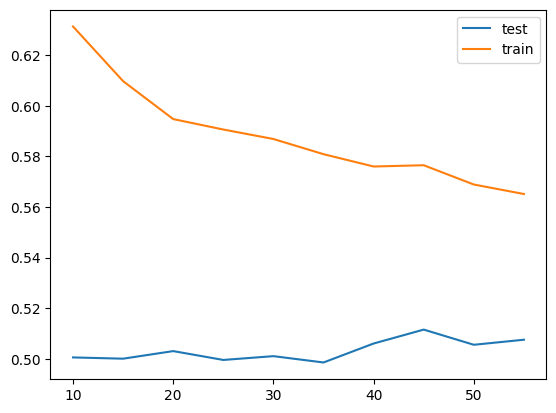

In [65]:
import matplotlib.pyplot as plt
plt.plot(range(10,60,5),accuracy_test_list)
plt.plot(range(10,60,5),accuracy_train_list)
plt.legend(['test','train'])
plt.show()

# plotting graph using f1_train and f1_test data

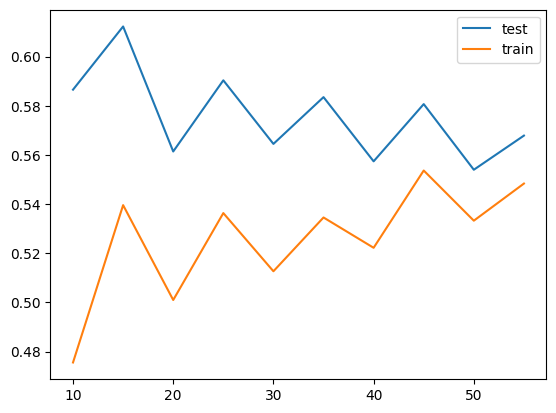

In [66]:
import matplotlib.pyplot as plt
plt.plot(range(10, 60, 5),f1_train_list)
plt.plot(range(10,60, 5),f1_test_list)
plt.legend(['test','train'])
plt.show()

In [67]:
from sklearn.metrics import classification_report
target_names = ['Postive', 'Negative']
print(classification_report(y_pred_test, y_test, target_names=target_names))
print(classification_report(y_pred_train, y_train, target_names=target_names))

              precision    recall  f1-score   support

     Postive       0.43      0.50      0.46       840
    Negative       0.59      0.52      0.55      1160

    accuracy                           0.51      2000
   macro avg       0.51      0.51      0.50      2000
weighted avg       0.52      0.51      0.51      2000

              precision    recall  f1-score   support

     Postive       0.56      0.56      0.56      3956
    Negative       0.57      0.57      0.57      4044

    accuracy                           0.57      8000
   macro avg       0.57      0.57      0.57      8000
weighted avg       0.57      0.57      0.57      8000



In [68]:
from sklearn.metrics import confusion_matrix
c= confusion_matrix(y_pred_train, y_train)
c

array([[2235, 1721],
       [1758, 2286]], dtype=int64)

<Axes: >

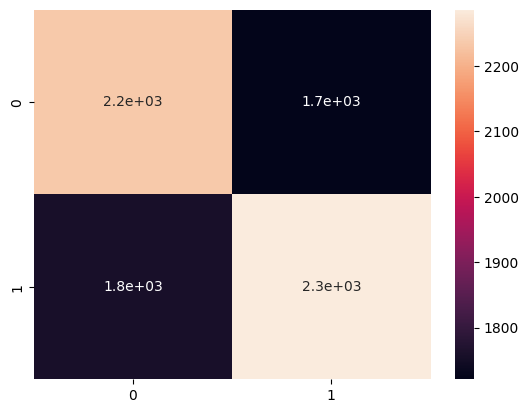

In [69]:
import seaborn as sns
sns.heatmap(c, annot=True)

In [70]:
neigh = KNeighborsClassifier(n_neighbors=10) #number of neighbour

# Training
neigh.fit(X_train, y_train) #.fit means model train 

# Test the training data
y_pred_train = neigh.predict(X_train)
accuracy_train = accuracy_score(y_pred_train,y_train)
accuracy_train_list.append(accuracy_train)
f1_train = f1_score(y_pred_train,y_train)
f1_train_list.append(f1_train)

# Test the test data
y_pred_test = neigh.predict(X_test)
accuracy_test = accuracy_score(y_pred_test,y_test)
accuracy_test_list.append(accuracy_test)
f1_test = f1_score(y_pred_test,y_test)
f1_test_list.append(f1_test)

print(accuracy_train,accuracy_test)
print(f1_train,f1_test)
print()

ValueError: could not convert string to float: 'i must say, i saw film site, i figur well worth view. i sore disappointed. from nearli open scene, obviou two suppos fbi agent are, fact, killers. could made obvious? if intend twist film, pretti sad. while pullman ormond excel actors, even talent match reprehens bad script. pullman adeptli act part sociopath killer... problem. there switch i play fbi guy! i kill peopl boy, arm tired. you blame actors... stori fail far way one.from onset film, however, i certain i wrong, director/writ blatantli obviou plot twist. ormond pullman must act strang order divert viewer attent real killers, i thought... gave film maker far much credit. i follow instinct turn movi even made past mark.to lynch credit, manag interject mani thing make good film: sex, violence, humor, well-train actors. too bad wrong configuration. hope pell jame recov role... i found perform particularli impressive, stun drug addict-turn would-b savior. she rewritten role crack whore win.thos peopl compar film natur born killers, take note: tarantino made charact mickey mallori reprehensible, yet sympathetic. the artistri film far overpow gore, seen surveillance. surveil wish natur born killers... fact, wet dream even fraction film was. folk seen surveillance... stick someth littl intelligence. like camp rock.'